# Personal Project: Animetrics Dashboard

<p>In this project, I plan to analyze the popularity of all the anime and manga from MyAnimeList. The data can be found from <a href=https://www.kaggle.com/datasets/nikhil1e9/myanimelist-anime-and-manga>this site</a>.</p> 

<p>In particular I plan to provide the following:
<ul>
    <li> A bar graph consisting of the number of readers of the 20 most popular anime (by rank).</li>
    <li> A bar graph consisting of the number of viewers of the 20 most popular manga (by rank).</li>
    <li> A list of the most popular manga and anime by decade.</li>
</ul>
</p>

<p>I plan to use Python libraries (Pandas, Matplotlib, Seaborn) and SQL to obtain and visualize the data above</p>
   

In [165]:
import csv, sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Create database using SQLite and connect to it using Magic SQL.

In [79]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Connect to SQLite3 server and create a database called "Animanga". Then create a cursor object to allow you to query data from the database.

In [80]:
connection = sqlite3.connect("Animanga.db")
cursor = connection.cursor()

In [81]:
%sql sqlite:///Animanga.db

### 2. Store the csv files into Pandas dataframes and then clean the data.

In <code>pd.read_csv()</code>, the <code>index_col=0</code> term sets the first column of the csv as the index column.

In [82]:
pathMN = r'C:\Users\nicco\OneDrive\Desktop\IBM Data Science Certificate\Personal_Projects\Animetrics_Project\MAL-manga.csv'
dfManga = pd.read_csv(pathMN, index_col=0)
dfManga.head(15)

,Title,Rank,Type,Volumes,Published,Members,page_url,image_url,Score
0,City Hunter,460,Manga,35,Feb 1985 - Nov 1991,14690,https://myanimelist.net/manga/792/City_Hunter,https://cdn.myanimelist.net/r/100x140/images/m...,8.16
1,Keijo!!!!!!!!,4532,Manga,18,Jul 2013 - Apr 2017,12689,https://myanimelist.net/manga/56505/Keijo,https://cdn.myanimelist.net/r/100x140/images/m...,7.31
2,Rain,1808,Manga,?,Nov 2008 -,12021,https://myanimelist.net/manga/17237/Rain,https://cdn.myanimelist.net/r/100x140/images/m...,7.67
3,Hidari no Futari,17377,One-shot,?,2011 - 2011,1010,https://myanimelist.net/manga/26610/Hidari_no_...,https://cdn.myanimelist.net/r/100x140/images/m...,5.95
4,Odd Girl Out,953,Manhwa,?,May 2015 -,4968,https://myanimelist.net/manga/119521/Odd_Girl_Out,https://cdn.myanimelist.net/r/100x140/images/m...,7.90
5,Watashi no Fushidara,17169,Manga,2,Nov 2015 - Dec 2016,3659,https://myanimelist.net/manga/106646/Watashi_n...,https://cdn.myanimelist.net/r/100x140/images/m...,6.07
6,Uchuu Senkan Yamato,12124,Manga,3,Oct 1974 - Dec 1979,1168,https://myanimelist.net/manga/33333/Uchuu_Senk...,https://cdn.myanimelist.net/r/100x140/images/m...,6.74
7,Ruru Chouchou,13402,One-shot,?,Dec 2012 - Dec 2012,457,https://myanimelist.net/manga/47807/Ruru_Chouchou,https://cdn.myanimelist.net/r/100x140/images/m...,6.64
8,Confession,4417,Manga,1,Apr 1998 - Sep 1998,6005,https://myanimelist.net/manga/1541/Confession,https://cdn.myanimelist.net/r/100x140/images/m...,7.32
9,Ibara no Namida,12480,Manga,1,Jan 2011 - Jan 2011,580,https://myanimelist.net/manga/33841/Ibara_no_N...,https://cdn.myanimelist.net/r/100x140/images/m...,6.71


Remove the '?' and replace with np.NaN.

In [83]:
dfManga.replace('?', np.NaN, inplace=True)

<br>For manga that are ongoing, we also want to replace the date range under 'Published' to 'Ongoing'.</br>
<code>dfManga['Published'].str.contains('- ')</code> will return True if the manga is finished and False if it's ongoing.

In [84]:
not_ongoing = dfManga['Published'].str.contains('- ')
not_ongoing.head(15)


0      True
1      True
2     False
3      True
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14    False
Name: Published, dtype: bool

If <code>dfManga['Published'].str.contains('- ')</code> returns False, then replace it with 'Ongoing' using the following command:

In [85]:
dfManga.loc[dfManga['Published'].str.contains('- ') == False, 'Published'] = 'Ongoing'
dfManga.head(15)
    

,Title,Rank,Type,Volumes,Published,Members,page_url,image_url,Score
0,City Hunter,460,Manga,35,Feb 1985 - Nov 1991,14690,https://myanimelist.net/manga/792/City_Hunter,https://cdn.myanimelist.net/r/100x140/images/m...,8.16
1,Keijo!!!!!!!!,4532,Manga,18,Jul 2013 - Apr 2017,12689,https://myanimelist.net/manga/56505/Keijo,https://cdn.myanimelist.net/r/100x140/images/m...,7.31
2,Rain,1808,Manga,NaN,Ongoing,12021,https://myanimelist.net/manga/17237/Rain,https://cdn.myanimelist.net/r/100x140/images/m...,7.67
3,Hidari no Futari,17377,One-shot,NaN,2011 - 2011,1010,https://myanimelist.net/manga/26610/Hidari_no_...,https://cdn.myanimelist.net/r/100x140/images/m...,5.95
4,Odd Girl Out,953,Manhwa,NaN,Ongoing,4968,https://myanimelist.net/manga/119521/Odd_Girl_Out,https://cdn.myanimelist.net/r/100x140/images/m...,7.90
5,Watashi no Fushidara,17169,Manga,2,Nov 2015 - Dec 2016,3659,https://myanimelist.net/manga/106646/Watashi_n...,https://cdn.myanimelist.net/r/100x140/images/m...,6.07
6,Uchuu Senkan Yamato,12124,Manga,3,Oct 1974 - Dec 1979,1168,https://myanimelist.net/manga/33333/Uchuu_Senk...,https://cdn.myanimelist.net/r/100x140/images/m...,6.74
7,Ruru Chouchou,13402,One-shot,NaN,Dec 2012 - Dec 2012,457,https://myanimelist.net/manga/47807/Ruru_Chouchou,https://cdn.myanimelist.net/r/100x140/images/m...,6.64
8,Confession,4417,Manga,1,Apr 1998 - Sep 1998,6005,https://myanimelist.net/manga/1541/Confession,https://cdn.myanimelist.net/r/100x140/images/m...,7.32
9,Ibara no Namida,12480,Manga,1,Jan 2011 - Jan 2011,580,https://myanimelist.net/manga/33841/Ibara_no_N...,https://cdn.myanimelist.net/r/100x140/images/m...,6.71


Repeat with the anime csv.

In [90]:
pathAN = r'C:\Users\nicco\OneDrive\Desktop\IBM Data Science Certificate\Personal_Projects\Animetrics_Project\MAL-anime.csv'
dfAnime = pd.read_csv(pathAN, index_col=0)
dfAnime.replace('?', np.NaN, inplace=True)
dfAnime.head(10)

,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55
1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55
2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29
3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36
4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44
5,Hana to Mogura,10991,Movie,1,1970 - 1970,595,https://myanimelist.net/anime/13089/Hana_to_Mo...,https://cdn.myanimelist.net/r/100x140/images/a...,5.45
6,Drifters (OVA): Kokuou-sama Goranshin,7084,Special,1,Dec 2017 - Dec 2017,7242,https://myanimelist.net/anime/37046/Drifters_O...,https://cdn.myanimelist.net/r/100x140/images/a...,6.37
7,Himitsukessha Taka no Tsume,8653,TV,11,Apr 2006 - Jun 2006,1216,https://myanimelist.net/anime/4737/Himitsukess...,https://cdn.myanimelist.net/r/100x140/images/a...,6.05
8,Nyanpire The Animation,5629,TV,12,Jul 2011 - Sep 2011,27709,https://myanimelist.net/anime/10197/Nyanpire_T...,https://cdn.myanimelist.net/r/100x140/images/a...,6.65
9,.hack//Intermezzo,6284,Special,1,Mar 2003 - Mar 2003,23083,https://myanimelist.net/anime/1143/hack__Inter...,https://cdn.myanimelist.net/r/100x140/images/a...,6.52


In [94]:
dfAnime.loc[dfAnime['Aired'].str.contains('- ') == False, 'Aired'] = 'Ongoing'
dfAnime.head(15)

,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55
1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55
2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29
3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36
4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44
5,Hana to Mogura,10991,Movie,1,1970 - 1970,595,https://myanimelist.net/anime/13089/Hana_to_Mo...,https://cdn.myanimelist.net/r/100x140/images/a...,5.45
6,Drifters (OVA): Kokuou-sama Goranshin,7084,Special,1,Dec 2017 - Dec 2017,7242,https://myanimelist.net/anime/37046/Drifters_O...,https://cdn.myanimelist.net/r/100x140/images/a...,6.37
7,Himitsukessha Taka no Tsume,8653,TV,11,Apr 2006 - Jun 2006,1216,https://myanimelist.net/anime/4737/Himitsukess...,https://cdn.myanimelist.net/r/100x140/images/a...,6.05
8,Nyanpire The Animation,5629,TV,12,Jul 2011 - Sep 2011,27709,https://myanimelist.net/anime/10197/Nyanpire_T...,https://cdn.myanimelist.net/r/100x140/images/a...,6.65
9,.hack//Intermezzo,6284,Special,1,Mar 2003 - Mar 2003,23083,https://myanimelist.net/anime/1143/hack__Inter...,https://cdn.myanimelist.net/r/100x140/images/a...,6.52


In [95]:
dfAnime.loc[dfAnime['Aired'].str.contains('Ongoing')]

,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
142,Honoo no Alpenrose: Ai no Symphony Ongaku-hen,10208,OVA,1,Ongoing,514,https://myanimelist.net/anime/35628/Honoo_no_A...,https://cdn.myanimelist.net/r/100x140/images/a...,5.68
782,Imokawa Mukuzo: Genkanban no Maki,11432,Movie,1,Ongoing,1019,https://myanimelist.net/anime/17387/Imokawa_Mu...,https://cdn.myanimelist.net/r/100x140/images/q...,5.30
1016,Puzzle & Dragon,10009,TV,NaN,Ongoing,1437,https://myanimelist.net/anime/37096/Puzzle___D...,https://cdn.myanimelist.net/r/100x140/images/a...,5.73
1075,Lian Qi Shi Wan Nian,4120,ONA,60,Ongoing,623,https://myanimelist.net/anime/54437/Lian_Qi_Sh...,https://cdn.myanimelist.net/r/100x140/images/a...,6.97
1351,AI no Idenshi,3888,TV,12,Ongoing,21942,https://myanimelist.net/anime/53787/AI_no_Idenshi,https://cdn.myanimelist.net/r/100x140/images/a...,7.03
...,...,...,...,...,...,...,...,...,...
12523,Ayaka,5822,TV,12,Ongoing,21405,https://myanimelist.net/anime/53428/Ayaka,https://cdn.myanimelist.net/r/100x140/images/a...,6.61
12569,Kirin the Noop,11830,TV,NaN,Ongoing,676,https://myanimelist.net/anime/35694/Kirin_the_...,https://cdn.myanimelist.net/r/100x140/images/a...,5.11
12588,Dubu Xiaoyao,5371,ONA,380,Ongoing,2901,https://myanimelist.net/anime/42267/Dubu_Xiaoyao,https://cdn.myanimelist.net/r/100x140/images/a...,6.70
12726,Sore Ike! Anpanman,6246,TV,NaN,Ongoing,3574,https://myanimelist.net/anime/1960/Sore_Ike_An...,https://cdn.myanimelist.net/r/100x140/images/a...,6.53


### 3. Export the data into SQL data tables.

In [11]:
# Dataframe.to_sql(name, connection, schema=None, if_exists='fail', 
#     index=True, index_label=None, #chunksize=None, dtype=None, method=None)

To_sql writes dataframe into sql table. Input parameters of to_sql:

- name: name of SQL table to be created from dataframe

- connection: the connection object (which database to connect to)

- if_exists: if table exists, what should be done?

- index=True: write dataframe index as a column.

- method="multi": pass multiple rows of SQL data in single INSERT clause.

In [96]:
dfManga.to_sql('MangaStats', connection, if_exists='replace', index=False, method='multi')

17811

In [97]:
dfAnime.to_sql('AnimeStats', connection, if_exists='replace', index=False, method='multi')

12774

Check to ensure that the correct database is created and the tables have been properly imported.

In [98]:
%%sql
SELECT name
FROM sqlite_master
WHERE type = "table";

 * sqlite:///Animanga.db
Done.


name
MangaStats
AnimeStats


In [99]:
%%sql
SELECT *
FROM MangaStats
LIMIT 5;

 * sqlite:///Animanga.db
Done.


Title,Rank,Type,Volumes,Published,Members,page_url,image_url,Score
City Hunter,460,Manga,35,Feb 1985 - Nov 1991,14690,https://myanimelist.net/manga/792/City_Hunter,https://cdn.myanimelist.net/r/100x140/images/manga/5/272237.jpg?s=91027a075fc64be41ed3f44b0186cc64,8.16
Keijo!!!!!!!!,4532,Manga,18,Jul 2013 - Apr 2017,12689,https://myanimelist.net/manga/56505/Keijo,https://cdn.myanimelist.net/r/100x140/images/manga/3/168393.jpg?s=630ab39042bfd9b95226a974cb5920b3,7.31
Rain,1808,Manga,None,Ongoing,12021,https://myanimelist.net/manga/17237/Rain,https://cdn.myanimelist.net/r/100x140/images/manga/3/25899.jpg?s=fc5341a8b225edc266780a138e24db97,7.67
Hidari no Futari,17377,One-shot,None,2011 - 2011,1010,https://myanimelist.net/manga/26610/Hidari_no_Futari,https://cdn.myanimelist.net/r/100x140/images/manga/3/42789.jpg?s=491ea73ed1f10bba3610c7b74ef277af,5.95
Odd Girl Out,953,Manhwa,None,Ongoing,4968,https://myanimelist.net/manga/119521/Odd_Girl_Out,https://cdn.myanimelist.net/r/100x140/images/manga/2/222276.jpg?s=bef6998d7e636de5d833d0be680b4118,7.9


In [17]:
%%sql
SELECT *
FROM AnimeStats
LIMIT 5;

 * sqlite:///Animanga.db
Done.


Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no_Susume,https://cdn.myanimelist.net/r/100x140/images/anime/3/87463.jpg?s=db709e677b62490fbf95785ed1dac6b7,7.55
Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_Evangelion__The_End_of_Evangelion,https://cdn.myanimelist.net/r/100x140/images/anime/1404/98182.jpg?s=98628f236cf7dbac1e0b6eb6d0615aa5,8.55
Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/anime/1714/104368.jpg?s=fa00bd8ccbfc255b27f0b8d24b034b10,5.29
s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/anime/8/89882.jpg?s=82657db302a858b9747cd5de04e3a939,7.36
Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Majutsu_no_Index-tan_III,https://cdn.myanimelist.net/r/100x140/images/anime/1937/98538.jpg?s=0c59f7c19e24490f3cd26266b42a0619,6.44


### 4. Determine the 10 most popular manga and anime and plot the number of readers/viewers in a bar graph.

Determine the manga with the top 20 rankings. Determine the number of members - that is, the number of people who have read it.
Note that having more members doesn't necessarily mean it's the most popular - the aggregate score of the manga comes into play too.

In [100]:
%%sql
SELECT Title, Rank, Members
FROM MangaStats
ORDER BY Rank ASC NULLS LAST
LIMIT 20;

 * sqlite:///Animanga.db
Done.


Title,Rank,Members
Berserk,1,637448
JoJo no Kimyou na Bouken Part 7: Steel Ball Run,2,246104
Vagabond,3,345175
One Piece,4,573384
Monster,5,226020
Slam Dunk,6,156001
Vinland Saga,7,279101
Fullmetal Alchemist,8,282763
Grand Blue,9,166433
Oyasumi Punpun,10,409969


<p>It's not surprising that Berserk is ranked at number 1. That being said, I've never read JoJo's Bizzare Adventure: Steel Ball Run. Nor have I heard of Vagabond or Oyasumi Punpun.</p>
<p>Let's store this data into a pandas dataframe called 'MangaDF'.</p>

In [101]:
Manga_stats = %sql SELECT Title, Rank, Members FROM MangaStats ORDER BY Rank ASC NULLS LAST LIMIT 20;
MangaDF = Manga_stats.DataFrame()
type(MangaDF)

 * sqlite:///Animanga.db
Done.


pandas.core.frame.DataFrame

Determine the anime with the top 20 rankings. Determine the number of members - that is, the number of people who have watched it.
Note that having more members doesn't necessarily mean it's the most popular - the aggregate score of the anime comes into play too.

In [102]:
%%sql
SELECT Title, Rank, Members
FROM AnimeStats
ORDER BY Rank ASC NULLS LAST
LIMIT 20;

 * sqlite:///Animanga.db
Done.


Title,Rank,Members
Fullmetal Alchemist: Brotherhood,1,3188280
Steins;Gate,2,2449954
Bleach: Sennen Kessen-hen,3,453048
Gintama°,4,598624
Kaguya-sama wa Kokurasetai: Ultra Romantic,5,830316
Shingeki no Kyojin Season 3 Part 2,6,2115515
Shingeki no Kyojin: The Final Season - Kanketsu-hen,7,446872
Gintama',8,528133
Gintama: The Final,9,134175
Hunter x Hunter (2011),10,2669186


In [103]:
Anime_stats = %sql SELECT Title, Rank, Members FROM AnimeStats ORDER BY Rank ASC NULLS LAST LIMIT 20;
AnimeDF = Anime_stats.DataFrame()
type(AnimeDF)

 * sqlite:///Animanga.db
Done.


pandas.core.frame.DataFrame

###### Plot the number of viewers of each manga.

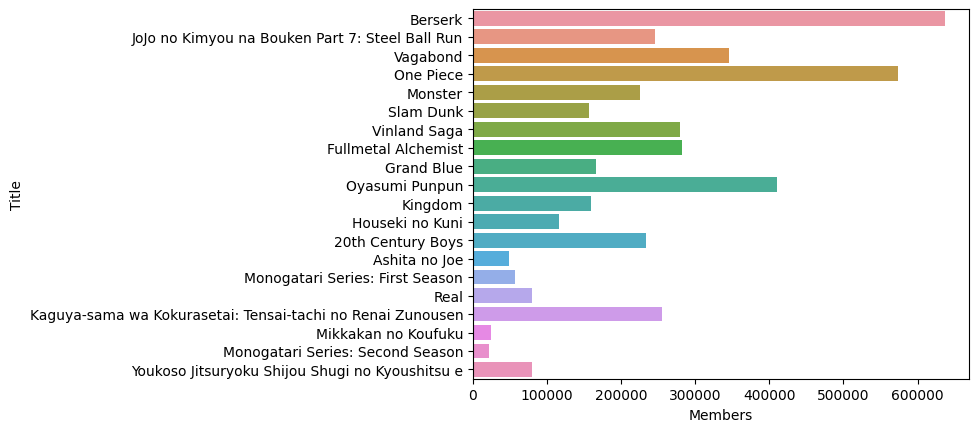

In [37]:
plot = sns.barplot(y='Title',x='Members', data=MangaDF)

##### Plot the number of viewers of each anime.

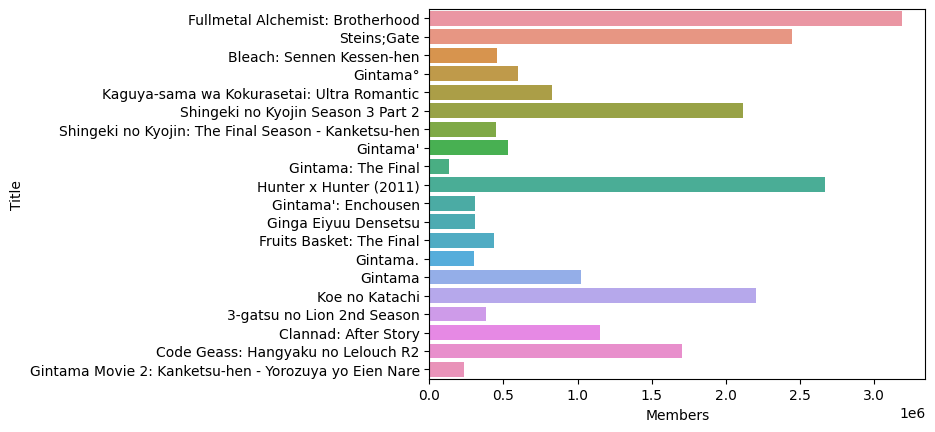

In [104]:
plot = sns.barplot(y='Title',x='Members', data=AnimeDF)

### 5. Determine the most popular manga and anime by decade.

Display the top 5 mangas from the 1940s.

In [106]:
%%sql
SELECT Title, Rank, Members, Published
FROM MangaStats
WHERE Published LIKE '%194%'
ORDER BY Rank ASC NULLS LAST
LIMIT 5;

 * sqlite:///Animanga.db
Done.


Title,Rank,Members,Published
Chiteikoku no Kaijin,9953,585,Feb 1948 - Feb 1948
Sazae-san,11873,655,Apr 1946 - Feb 1974
Shin Takarajima,12517,1655,Apr 1947 - Apr 1947
Metropolis,12967,3028,Sep 1949 - Sep 1949
Lost World,15300,1218,Dec 1948 - Dec 1948


Display the top 5 mangas that are ongoing.

In [105]:
%%sql
SELECT Title, Rank, Members, Published
FROM MangaStats
WHERE Published LIKE '%Ongoing%'
ORDER BY Rank ASC NULLS LAST
LIMIT 5;

 * sqlite:///Animanga.db
Done.


Title,Rank,Members,Published
Berserk,1,637448,Ongoing
One Piece,4,573384,Ongoing
Vinland Saga,7,279101,Ongoing
Grand Blue,9,166433,Ongoing
Kingdom,11,159673,Ongoing


Let's determine the manga with the highest rank in each decade. First, create a list called <code>decades</code>.

In [172]:
decade = range(194,203)
decades = [str(x) for x in decade]
for i, value in enumerate(decades):
    decades[i]='%'+value+'%'

decades.append('Ongoing')
decades
    

['%194%',
 '%195%',
 '%196%',
 '%197%',
 '%198%',
 '%199%',
 '%200%',
 '%201%',
 '%202%',
 'Ongoing']

Then create an empty dataframe with columns called 'Title', 'Rank', 'Members', 'Published'.

In [173]:
DFManga_by_decade = pd.DataFrame(columns = ['Title', 'Rank', 'Members', 'Published'])
DFManga_by_decade

    

,Title,Rank,Members,Published


For each decade in decades, we're going to use SQL queries to determine the manga with the highest rank, store the SQL result in a dataframe, and append the dataframe to <code>DFManga_by_decade</code>

In [174]:
for term in decades:
    
    # Obtain the most popular manga for given decade.
    popManga = %sql SELECT Title, Rank, Members, Published FROM MangaStats WHERE Published LIKE :term ORDER BY Rank ASC NULLS LAST LIMIT 1;
    
    # Convert results of a SQL query into a list of list.
    x = [list(value) for value in popManga]
    #print(x)
    #print(len(DFManga_by_decade.index))
    
    # Append the list from the SQL query into the DFManga_by_decade dataframe.
    DFManga_by_decade.loc[len(DFManga_by_decade.index)]=x[0]

# Display the result.
DFManga_by_decade
    



 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.


,Title,Rank,Members,Published
0,Chiteikoku no Kaijin,9953,585,Feb 1948 - Feb 1948
1,38-do Senjou no Kaibutsu,2599,276,1952 - 1953
2,Ashita no Joe,14,48270,Jan 1968 - May 1973
3,Ashita no Joe,14,48270,Jan 1968 - May 1973
4,Kaze no Tani no Nausicaä,31,54824,Oct 1982 - Feb 1994
5,Vagabond,3,345175,Sep 1998 - May 2015
6,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,2,246104,Jan 2004 - Apr 2011
7,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,2,246104,Jan 2004 - Apr 2011
8,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,17,254790,May 2015 - Nov 2022
9,Berserk,1,637448,Ongoing


In [175]:
DFAnime_by_decade = pd.DataFrame(columns = ['Title', 'Rank', 'Members', 'Aired'])

for term in decades:
    
    # Obtain the most popular manga for given decade.
    popAn = %sql SELECT Title, Rank, Members, Aired FROM AnimeStats WHERE Aired LIKE :term ORDER BY Rank ASC NULLS LAST LIMIT 1;
    #print(popAn)
    
    # Convert results of a SQL query into a list of list.
    y = [list(value) for value in popAn]
    #print(y)
    #print(len(DFAnime_by_decade.index))
    
    # Append the list from the SQL query into the DFAnime_by_decade dataframe.
    DFAnime_by_decade.loc[len(DFAnime_by_decade.index)]=y[0]

# Display the result.
DFAnime_by_decade
    


 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.


,Title,Rank,Members,Aired
0,Kumo to Tulip,10301,2276,Apr 1943 - Apr 1943
1,Kuroi Kikori to Shiroi Kikori,8227,925,Jul 1956 - Jul 1956
2,Sasuke,2531,1927,Sep 1968 - Mar 1969
3,Versailles no Bara,224,92801,Oct 1979 - Sep 1980
4,Ginga Eiyuu Densetsu,12,306464,Jan 1988 - Mar 1997
5,Ginga Eiyuu Densetsu,12,306464,Jan 1988 - Mar 1997
6,Fullmetal Alchemist: Brotherhood,1,3188280,Apr 2009 - Jul 2010
7,Fullmetal Alchemist: Brotherhood,1,3188280,Apr 2009 - Jul 2010
8,Bleach: Sennen Kessen-hen,3,453048,Oct 2022 - Dec 2022
9,One Piece,55,2182691,Ongoing
